# Data Literacy - Project
## Gender Share in Movies
#### Tobias Stumpp, Sophia Herrmann

### README & TODO

This file analyzes the time-frame around 2000 (1980 - 2020), when the Bechdel test became worldwide known.
- First, the share of actresses on principal cast for each movie is taken and plotted over the years from 1980 to 2020. Additionally, their mean was taken for each year, and added to the plot. 

- A second plot present only the mean value of the shares for each year.
To see finer mean chances.

Those plots intend to present a possible change in the share of actresses on principal cast over the years, due to the puplication of the Bechdel test

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
path = '../dat/'
os.chdir(path)

### Read data, add the computed share of actresses on principal cast into the data set and split the data set into the two time frames

In [3]:
data_movie = pd.read_csv('data_movie.csv')

# Keep only the years of 2000 to 2020 & sort the data frame according years
data_1980_2020 = data_movie[(data_movie.startYear >= 1980) & (data_movie.startYear <= 2020)].sort_values("startYear")

In [4]:
# Compute share of actresses on the principal cast for each movie and include it into the data set

# 1)
# Number Actress & Number Actors
number_cast = pd.crosstab(data_1980_2020['tconst'], data_1980_2020['category']).reset_index().rename(columns = {
    'actor':'nactor',
    'actress':'nactress',
})

# Merge number of actress & actors to data_movie, and delete original category-column & delete row-duplicates
data_1980_2020 = pd.merge(data_1980_2020, number_cast, on="tconst", how='left')
data_1980_2020.drop(["category"], axis = 1, inplace = True)
data_1980_2020 = data_1980_2020.drop_duplicates()

# 2)
data_1980_2020["proportion"] = data_1980_2020["nactress"] / (data_1980_2020["nactress"] + data_1980_2020["nactor"])

In [5]:
# Split data set into the range of years from 1980 - 2000 & 2000 - 2020:

data_1980 = data_1980_2020[(data_1980_2020.startYear >= 1980) & (data_1980_2020.startYear < 2000)].sort_values("startYear")
data_2020 = data_1980_2020[(data_1980_2020.startYear >= 2000) & (data_1980_2020.startYear <= 2020)].sort_values("startYear")

In [6]:
# Compute the mean of the share of actresses on principal cast grouped by years
mean_1980 = data_1980.groupby("startYear").proportion.mean().reset_index().proportion
mean_2020 = data_2020.groupby("startYear").proportion.mean().reset_index().proportion
years_1980 = data_1980.groupby("startYear").proportion.mean().reset_index().startYear
years_2020 = data_2020.groupby("startYear").proportion.mean().reset_index().startYear



--------------------
### Analyize the share of actresses on principal cast for each movie over the years from 1980-2020 and mark the mean value for each year

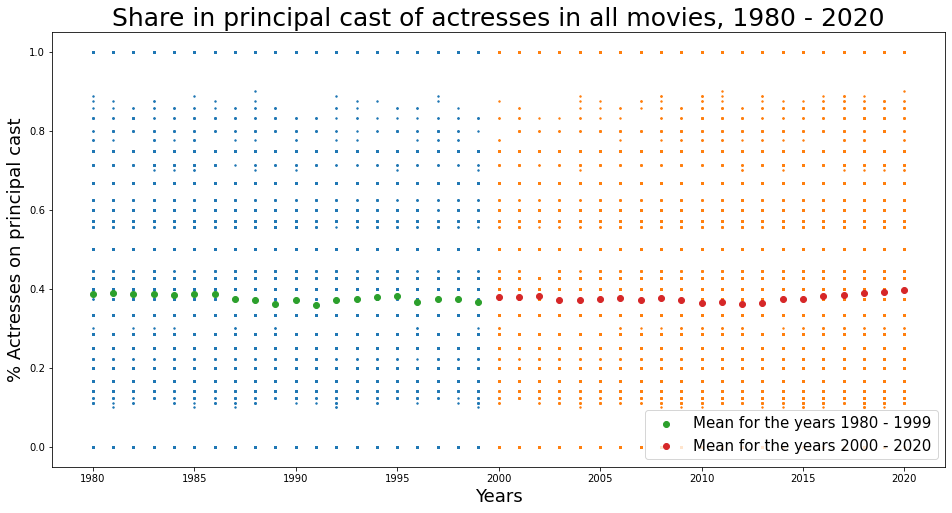

In [7]:
# Plot Actresses on principal cast
plt.figure(figsize=(16,8))
plt.scatter(data_1980.startYear, data_1980.proportion, s = 2)
plt.scatter(data_2020.startYear, data_2020.proportion, s = 2)

plt.scatter(years_1980, mean_1980, label = "Mean for the years 1980 - 1999")
plt.scatter(years_2020, mean_2020, label = "Mean for the years 2000 - 2020")

plt.xlabel("Years",  fontsize=18)
plt.ylabel("% Actresses on principal cast",  fontsize=18)
plt.legend(fontsize=15, loc = "lower right")

plt.title("Share in principal cast of actresses in all movies, 1980 - 2020", fontsize=25)
plt.savefig('../doc/projectsubmission2022/fig-001_Share-in-principal-cast-of-actresses-in-all-movies-1980-2020.png')
plt.show()

Result:
There is no change in the pattern over the two time frames identifiable.
Further, the variation in each year is super high.
The mean values do not indicate a high difference between both time frames, but a slightly higher level for the time after 2000 compared to before 2000.
The next plot, presents a better insight, zooming into it.

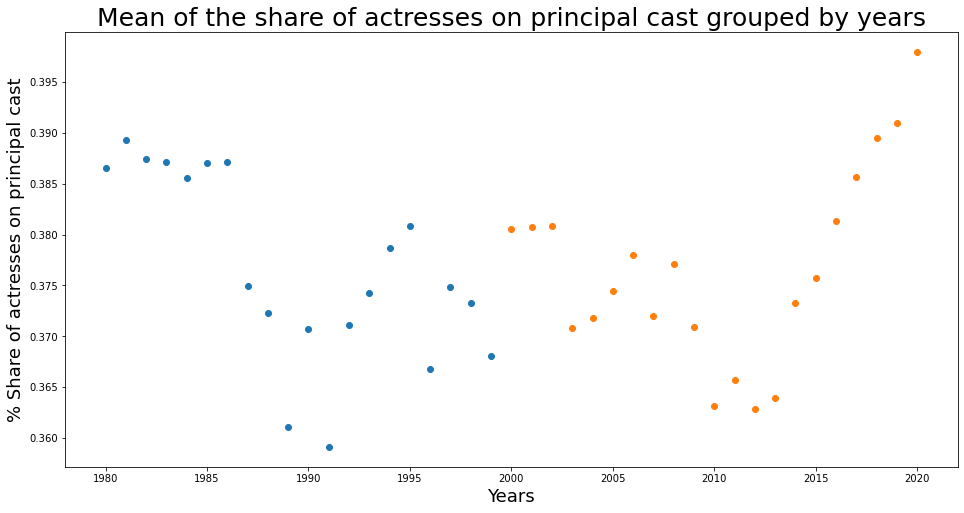

In [8]:
# Plot the mean of the share of actresses on principal cast grouped by years
plt.figure(figsize=(16,8))
plt.scatter(years_1980, mean_1980)
plt.scatter(years_2020, mean_2020)
plt.title("Mean of the share of actresses on principal cast grouped by years", fontsize=25)
plt.xlabel("Years",  fontsize=18)
plt.ylabel("% Share of actresses on principal cast",  fontsize=18)
plt.show()

Mean values on the right time frame seem to be little higher than the others.
Test for significant chances between those time frames will be considered.